<a href="https://colab.research.google.com/github/MicahSee/Stock-Pattern-Autoencoder/blob/main/Stock_Data_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
API_KEY = ''
SYMBOL = 'AAPL'

In [ ]:
start_date = '2022-01-01'
end_date = '2024-01-01'

In [ ]:
import requests

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={SYMBOL}&outputsize=full&datatype=csv&apikey={API_KEY}'

r = requests.get(url)
with open(f'{SYMBOL}_daily_price_volume.csv', 'wb') as f:
    f.write(r.content)

In [ ]:
from datetime import datetime

start_year = 2023
start_month = 1
start_day = 1

end_year = 2024
end_month = 1
end_day = 1

start_date = datetime(start_year, start_month, start_day, 0, 0, 0)
end_date = datetime(end_year, end_month, end_day, 0, 0, 0)

time_from = start_date.strftime('%Y%m%dT%H%M')
time_to = end_date.strftime('%Y%m%dT%H%M')

limit = 1000

url = f'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers={SYMBOL}&time_from={time_from}&time_to={time_to}&limit={limit}&apikey={API_KEY}'
r = requests.get(url)
data = r.json()

In [ ]:
url

'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=AAPL&time_from=20230101T0000&time_to=20240101T0000&limit=1000&apikey=ZN0OVWTE2EQWLSVI'

In [ ]:
import pandas as pd

parsed_data = []

for entry in data['feed']:
    parsed_data.append((entry['time_published'], entry['title'], entry['overall_sentiment_score']))

news_df = pd.DataFrame(parsed_data, columns=['published', 'title', 'overall_sentiment_score'])
news_df.head()

In [ ]:
import numpy as np

In [ ]:
stock_df = pd.read_csv(f'{SYMBOL}_daily_price_volume.csv')

In [ ]:
stock_df['timestamp'] = pd.to_datetime(stock_df['timestamp'], format='%Y-%m-%d')
stock_df = stock_df[::-1]

In [ ]:
stock_df = stock_df[(stock_df['timestamp'] >= start_date) & (stock_df['timestamp'] <= end_date)]

In [ ]:
stock_df = stock_df.set_index(np.arange(len(stock_df)))

In [ ]:
stock_df

,timestamp,open,high,low,close,volume
0,2022-01-03,177.83,182.88,177.710,182.01,104701220
1,2022-01-04,182.63,182.94,179.120,179.70,99310438
2,2022-01-05,179.61,180.17,174.640,174.92,94537602
3,2022-01-06,172.70,175.30,171.640,172.00,96903955
4,2022-01-07,172.89,174.14,171.030,172.17,86709147
...,...,...,...,...,...,...
496,2023-12-22,195.18,195.41,192.970,193.60,37149570
497,2023-12-26,193.61,193.89,192.830,193.05,28919310
498,2023-12-27,192.49,193.50,191.090,193.15,47899806
499,2023-12-28,194.14,194.66,193.170,193.58,34049898


In [ ]:
news_df['timestamp'] = pd.to_datetime(news_df['published'], format='%Y%m%dT%H%M%S')
news_df = news_df.drop('published', axis=1)

In [ ]:
news_df

,title,overall_sentiment_score,timestamp
0,What to stream in January 2024: 'Masters of th...,0.056158,2023-12-31 21:16:00
1,3 Warren Buffett Dividend Growth Stocks to Buy...,0.366263,2023-12-31 15:00:00
2,Almost Half of Warren Buffett-led Berkshire Ha...,0.231095,2023-12-31 14:53:00
3,Why Artificial Intelligence ( AI ) Could Be ...,0.236511,2023-12-31 12:30:00
4,"$10,000 Invested in This Growth Stock Could Ma...",0.186947,2023-12-31 10:30:00
...,...,...,...
678,Apple Is Far Less Important to Berkshire Hatha...,0.199070,2023-12-03 15:32:00
679,These 3 Stocks Might Be Getting a Little Too E...,0.196009,2023-12-03 15:10:00
680,"After Soaring in 2023, Is Apple a Smart Stock ...",0.288616,2023-12-03 14:30:00
681,These 2 Artificial Intelligence ( AI ) Stock...,0.304409,2023-12-03 13:15:00


In [ ]:
result = news_df.groupby(news_df['timestamp'].dt.date)['overall_sentiment_score'].sum().reset_index()

In [ ]:
url = f'https://www.alphavantage.co/query?function=EARNINGS&symbol={SYMBOL}&apikey={API_KEY}'
r = requests.get(url)
data = r.json()

earnings_surprise = []

for entry in data['quarterlyEarnings']:
    earnings_surprise.append((entry['reportedDate'], entry['surprisePercentage']))

earnings_surprise_df = pd.DataFrame(earnings_surprise, columns=['timestamp', 'surprise_percentage'])
earnings_surprise_df['timestamp'] = pd.to_datetime(earnings_surprise_df['timestamp'], format='%Y-%m-%d')

In [ ]:
earnings_surprise_df = earnings_surprise_df[::-1]

In [ ]:
earnings_surprise_df = earnings_surprise_df[earnings_surprise_df['timestamp'] >= '2021-08-01']

In [ ]:
earnings_surprise_df = earnings_surprise_df.set_index(np.arange(len(earnings_surprise_df)))
earnings_surprise_df

,timestamp,surprise_percentage
0,2021-10-28,0
1,2022-01-27,11.1111
2,2022-04-28,6.2937
3,2022-07-28,3.4483
4,2022-10-27,1.5748
5,2023-02-02,-3.0928
6,2023-05-04,6.2937
7,2023-08-03,5.8824
8,2023-11-02,5.036


In [ ]:
merged_df = pd.merge_asof(stock_df, earnings_surprise_df, on='timestamp', direction='backward')

In [ ]:
merged_df['surprise_percentage'].unique()

array(['0', '11.1111', '6.2937', '3.4483', '1.5748', '-3.0928', '5.8824',
       '5.036'], dtype=object)

<Axes: >

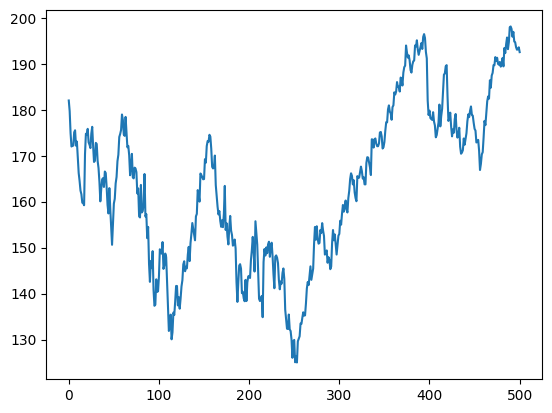

In [ ]:
merged_df['close'].plot()

In [ ]:
merged_df['surprise_percentage'] = merged_df['surprise_percentage'].astype(float)

In [ ]:
def generate_sequences(data, seq_len):
    sequences = []

    for i in range(len(data) - seq_len):
        seq = data.iloc[i:i+10, :].values
        sequences.append(seq)

    return np.array(sequences)

In [ ]:
train_data = generate_sequences(merged_df[['close', 'volume', 'surprise_percentage']], 10)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Assuming X_train is your input data with shape (num_sequences, num_features, 30)

class SelectHiddenStates(nn.Module):
    def __init__(self):
        super(SelectHiddenStates, self).__init__()
        self._name = 'select_hidden_states'

    def forward(self, inputs):
        output, (hn, cn) = inputs
        return hn

# Define the autoencoder model
class Autoencoder(nn.Module):
    def __init__(self, input_size, encoding_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.LSTM(input_size, encoding_size, batch_first=True),
            SelectHiddenStates(),
            nn.Linear(encoding_size, encoding_size),
        )

        self.decoder = nn.Sequential(
            nn.Linear(encoding_size, input_size),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
train_tensor = torch.tensor(train_data, dtype=torch.float32)

In [ ]:
# Create DataLoader
dataset = TensorDataset(train_tensor, train_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Initialize the autoencoder
input_size = 3  # number of features per timestep
encoding_size = 32  # size of the encoded representation
autoencoder = Autoencoder(input_size, encoding_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

In [ ]:
next(iter(dataloader))[1].shape

torch.Size([32, 10, 3])

In [ ]:
# Train the autoencoder

num_epochs = 50
for epoch in range(num_epochs):
    for inputs, _ in dataloader:
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        print(outputs.shape)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

torch.Size([1, 32, 3])
torch.Size([32, 10, 3])


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32, 10, 3])) that is different to the input size (torch.Size([1, 32, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (32) must match the size of tensor b (10) at non-singleton dimension 1